# Loading (and saving) data from frequently used sources

This Jupyter Notebook provides examples of how to read in data from a variety of frequently used data-types, as well as how to save the datasets into said file-types. 

This Notebook provides examples for the most common use-cases, requiring only pandas and openpyxl to be installed (for Excel). Another notebook will be created for more advanced data formats, often requiring other packages. The data formats listed in 'red' below, will be covered in the 'advanced' Notebook

For tabular data, we will use the functionality pandas out of the box, for tabular data stored in: 
* <a href="#csv">csv</a>, <a href="#txt">txt</a>, <a href="#excel">Excel</a>, <font color='red'>SQL</font>, <font color='red'>parquet</font>

Some of these are enhanced through additional libraries that need to be installed (that pandas relies on). More information is provided in the corresponding section.

Configurations are often stored in formats suitable to be read into Dictionaries, and common file types include:

* <a href="#json">json</a>, <font color='red'>yaml</font>

Lastly, to load and save more complicates objects, Python provides additional serialization options such as:

* <a href="#pickle">pickle</a>, <font color='red'>pmml (e.g. for cross-platform ML models)</font>

**Note: When pandas will automatically attempt to detect the data type in each column. If the data has a large number of rows, by default Pandas will attempt to use a subset of the data to detect the data type. This can be a problem if a column contains a large number of blank values, or is a string with many values that could be misconstrued as numbers. In these cases, use the 'low_memory=False' argument.**

<a id="csv"></a>
# Load and Save CSV data

This uses the read_csv and to_csv capabilities in pandas:
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [1]:
# Load in required packages
import pandas as pd

In [2]:
data_from_csv = pd.read_csv("sample_input/iris.csv", low_memory=False) # For small datasets, low_memory=False is not necessary

In [3]:
data_from_csv.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
# Save into CSV
data_from_csv.to_csv("sample_output/iris.csv", index=False) 
# index=False prevents the 'index' (01,2,3,4...) to be saved as the first column in the csv

<a id="txt"></a>
# Load and Save TXT data

This can still use the csv functionality! But you will need to specify the separator (if it is not comma-separated):
* https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html


In [5]:
# Load in required packages
import pandas as pd

In [6]:
# This file is tab-separated
data_from_txt = pd.read_csv("sample_input/iris_tab_separated.txt", sep='\t')

In [7]:
data_from_txt.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# Save into TXT. In this example, we save it as a semi-colon separated file
data_from_txt.to_csv("sample_output/iris_semicolon_separated.txt", sep=';', index=False)
# index=False prevents the 'index' (01,2,3,4...) to be saved as the first column in the txt

<a id="excel"></a>
# Load and Save Excel data

This reads in an Excel file, using pandas:
* https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html

This can be used to read in from specific tabs and cells/ranges within Excel. This makes use of additional Python packages built to handle Excel input/output (such as openpyxl, odf, pyxlsb) -- see the 'Engine' argument in the link above. By default, it will use openpyxl. Do not use 'xlrd', as it only works with the old 'xls' format


In [9]:
# Load in required packages
import pandas as pd
import openpyxl

In [10]:
# This writes and saves the data into a single tab Excel, where the data starts in cell A1, similar to reading in a CSV
data_from_excel = pd.read_excel("sample_input/iris_single_tab.xlsx")

In [11]:
# This saves the data into a single tab Excel starting in cell A1
data_from_excel.to_excel("sample_output/iris_single_tab.xlsx",index=False)

With Excel files, there is a lot of flexibility for where data is stored and formatted. The following provides an example where data from the second tab of an Excel is read in, and a two-tab Excel is created.

To write multiple tabs into an Excel using pandas, the ExcelWriter functionality is needed to create the Excel
https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html

In [12]:
# Data is stored in the second tab, named "iris", 
# with headers starting in B3 going left to right, and data starting in B5 going left to right

data_from_excel_2 = pd.read_excel("sample_input/iris_multi_tab.xlsx",
                                  sheet_name = "iris",
                                  index_col = None, # No index column
                                  skiprows = [0, 1,3], # No data in first, second, fourth rows
                                  usecols=lambda x: 'Unnamed' not in x # Skip blank columns
                                 )

data_from_excel_2.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [13]:
# Create a blank Excel file with two tabs.

writer = pd.ExcelWriter('sample_output/iris_multi_tab.xlsx', engine='openpyxl')

# Populate the first tab description: Text stored in a dataframe
pd.DataFrame({"Description":["Hello World"]}).T.to_excel(writer,
                                                         sheet_name = "Description",
                                                         index=True,
                                                         header=False,
                                                         startrow = 1,
                                                         startcol = 2
                                                        )

# Then populate a second tab with the data
data_from_excel_2.to_excel(writer,
                                 sheet_name = "Data",
                                 index=False,
                                 header=True,
                                 startrow = 1,
                                 startcol = 2
                                )


# Save
writer.save()

<a id="json"></a>
# Read and write from json

Python has a built in package called json for writing and reading json files. Refer to: https://docs.python.org/3/library/json.html

In [14]:
import json

In [15]:
# Opening JSON file
with open('sample_input/example_json.json') as file:
    
    # returns JSON object as a dictionary
    json_data = json.load(file)
    
json_data

{'Name': 'Test',
 'Mobile': 12345678,
 'Boolean': True,
 'Pets': ['Dog', 'cat'],
 'Address': {'Permanent address': 'USA', 'current Address': 'AU'}}

In [16]:
# Write json files
with open('sample_output/example_json.json', 'w') as file:  # The 'w' is for 'write'
    json_string = json.dumps(json_data)
    
    file.write(json_string)

<a id="pickle"></a>
# Read and write a pickle file

pickle is Python's native method for serializing objects, allowing you to store virtually any objects: https://docs.python.org/3/library/pickle.html 

**Beware: Do not load (unpickle) unknown pickle files, as the file can potentially contain malicious code. Where possible, use other serialization methods where possible (as per examples above)**
* There are methods to store some models as json, e.g. https://github.com/mlrequest/sklearn-json

In this example, we create a dictionary containing a string, a list, a pandas dataframe, and a matplotlib figure, and save it as a pickle file. Then we also show how to load the saved pickle file 

In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

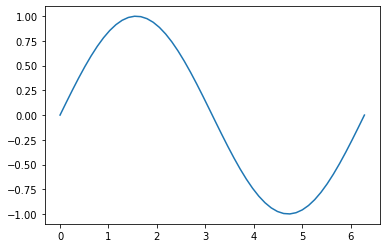

In [18]:
# Create each of the items
test_string = "This is a pickle example"
test_list = ["A", "B", "C", "D"]
test_pandas = pd.DataFrame({"Col1": [1,2,3], "Col2":[-1,-2,-3], "Col3": [0,0,0]})
test_fig = plt.figure()
x = np.linspace(0,2*np.pi)
y = np.sin(x)
plt.plot(x,y)

# Create the dictionary
dictionary_to_save = {
    "my_string": test_string,
    "my_list": test_list,
    "my_pandas": test_pandas,
    "my_figure": test_fig
}

In [19]:
# Pickle the dictionary into a file
with open('sample_output/example_pickle.pickle', 'wb') as file:  # The 'w' is for 'write', and 'b' for binary (not )
    pickle.dump(dictionary_to_save,file)

In [20]:
# Read in the pickle file
with open('sample_output/example_pickle.pickle', 'rb') as file:  # The 'r' is for 'read', and 'b' for binary (not )
    loaded_pickle = pickle.load(file)
    
# Check the file
loaded_pickle

{'my_string': 'This is a pickle example',
 'my_list': ['A', 'B', 'C', 'D'],
 'my_pandas':    Col1  Col2  Col3
 0     1    -1     0
 1     2    -2     0
 2     3    -3     0,
 'my_figure': <Figure size 432x288 with 1 Axes>}

In [21]:
# To access the pandas dataframe
loaded_pickle['my_pandas']

,Col1,Col2,Col3
0,1,-1,0
1,2,-2,0
2,3,-3,0


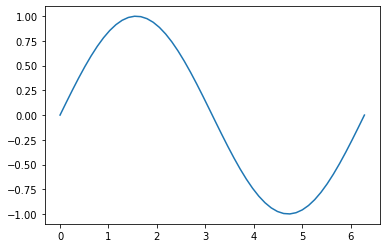

In [22]:
# To access the figure
loaded_pickle['my_figure']